In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [16]:
bmi_labels = ["Underweight", "Healthy weight", "Overweight", "Obese"]
cut_bins = [0, 18.5, 24.9, 29.9, 150]
df['bmi_label'] = pd.cut(df['bmi'], bins=cut_bins, labels=bmi_labels)
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           bmi_label  
0         Overweight  
1              Obese  
2              Obese  
3     Healthy weight  
4         Overweight  
...              ... 

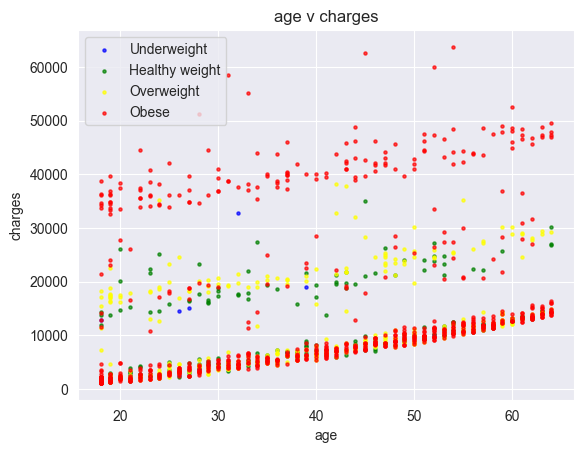

In [17]:
bmi_colors = {"Underweight": "blue", "Healthy weight": "green", "Overweight": "yellow", "Obese": "red"}

fig, ax = plt.subplots()
for bmi_label, dftemp in df.groupby('bmi_label'):
    dftemp.plot('age', 'charges', kind='scatter', c=bmi_colors[bmi_label], label=bmi_label, marker='.', alpha=.7, ax=ax)
plt.title('age v charges')
plt.show()

In [18]:
ovw_smokers = df.loc[(df['smoker'] == 'yes') & ((df['bmi_label'] == "Overweight") | (df['bmi_label'] == 'Obese'))]
print(ovw_smokers)

      age     sex     bmi  children smoker     region      charges   bmi_label
0      19  female  27.900         0    yes  southwest  16884.92400  Overweight
11     62  female  26.290         0    yes  southeast  27808.72510  Overweight
14     27    male  42.130         0    yes  southeast  39611.75770       Obese
19     30    male  35.300         0    yes  southwest  36837.46700       Obese
23     34  female  31.920         1    yes  northeast  37701.87680       Obese
...   ...     ...     ...       ...    ...        ...          ...         ...
1308   25  female  30.200         0    yes  southwest  33900.65300       Obese
1313   19  female  34.700         2    yes  southwest  36397.57600       Obese
1321   62    male  26.695         0    yes  northeast  28101.33305  Overweight
1323   42  female  40.370         2    yes  southeast  43896.37630       Obese
1337   61  female  29.070         0    yes  northwest  29141.36030  Overweight

[219 rows x 8 columns]


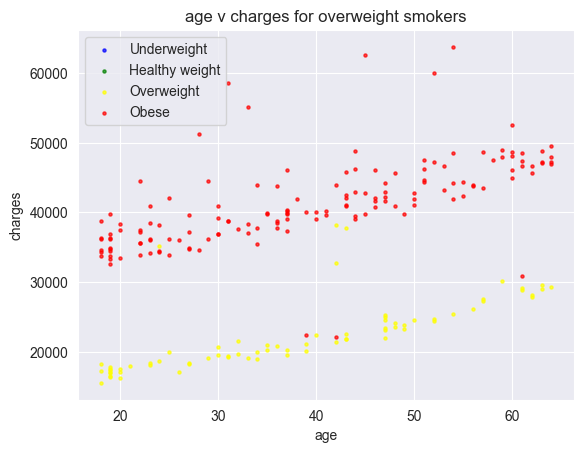

In [19]:
fig, ax = plt.subplots()
for bmi_label, ovw_smokers_temp in ovw_smokers.groupby('bmi_label'):
    ovw_smokers_temp.plot('age', 'charges', kind='scatter', c=bmi_colors[bmi_label], label=bmi_label, marker='.', alpha=.7, ax=ax)

plt.title('age v charges for overweight smokers')
plt.show()

In [6]:
m_obs_smokers = df.loc[(df['smoker'] == 'yes') & (df['bmi_label'] == 'Obese') & (df['sex'] == 'male')]

print(m_obs_smokers)

      age   sex     bmi  children smoker     region      charges bmi_label
14     27  male  42.130         0    yes  southeast  39611.75770     Obese
19     30  male  35.300         0    yes  southwest  36837.46700     Obese
29     31  male  36.300         2    yes  southwest  38711.00000     Obese
30     22  male  35.600         0    yes  southwest  35585.57600     Obese
34     28  male  36.400         1    yes  southwest  51194.55914     Obese
...   ...   ...     ...       ...    ...        ...          ...       ...
1284   61  male  36.300         1    yes  southwest  47403.88000     Obese
1288   20  male  39.400         2    yes  southwest  38344.56600     Obese
1291   19  male  34.900         0    yes  southwest  34828.65400     Obese
1300   45  male  30.360         0    yes  southeast  62592.87309     Obese
1301   62  male  30.875         3    yes  northwest  46718.16325     Obese

[94 rows x 8 columns]


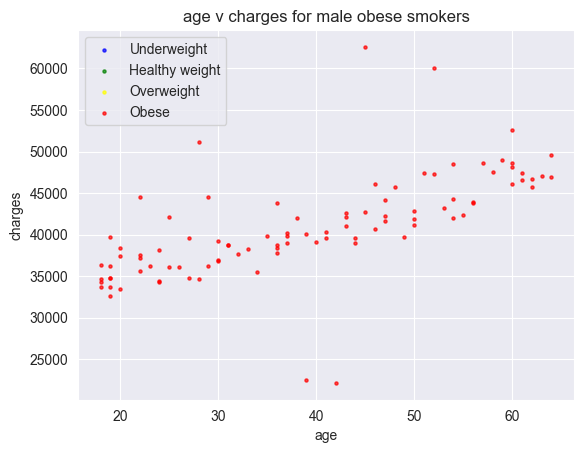

In [20]:
fig, ax = plt.subplots()
for bmi_label, m_obs_smokers_temp in m_obs_smokers.groupby('bmi_label'):
    m_obs_smokers_temp.plot('age', 'charges', kind='scatter', c=bmi_colors[bmi_label], label=bmi_label, marker='.', alpha=.7, ax=ax)

plt.title('age v charges for male obese smokers')
plt.show()

In [8]:
#create a 1D list of lists for age as the x axis and charges as the y axis
x = m_obs_smokers.iloc[:, 0].values.reshape(-1,1)
y = m_obs_smokers.iloc[:, 6].values.reshape(-1,1)

In [9]:
#create an age list that covers the range of min to max ages in the x axis incrementally increasing by .01 of an age
# *100 and /100 are used because range works at an integer level not a float level
age_list = [g/100 for g in range(m_obs_smokers['age'].min()*100, (m_obs_smokers['age'].max()*100)+1)]

In [21]:
df_plot1 = pd.DataFrame(columns=['age'])
df_plot1['age'] = age_list

df_plot2 = df_plot1.copy(deep=True)

print(df_plot1)

        age
0     18.00
1     18.01
2     18.02
3     18.03
4     18.04
...     ...
4596  63.96
4597  63.97
4598  63.98
4599  63.99
4600  64.00

[4601 rows x 1 columns]


In [22]:
# Random Forest regressor models use subsets of the provided date to develop multiple decision trees instead of just one.
# it then uses the multiple trees when doing predictions and averaging the results.  The random selections of subset data
# help to curb some overfitting by lessening the impacts that one overfitted tree may have by introducing randomness to the calculations
rf_regr1e1k = RandomForestRegressor(n_estimators=1000, max_depth=2, min_samples_leaf=9)
rf_regr2e100 = RandomForestRegressor(n_estimators=100, max_depth=2, min_samples_leaf=9)
rf_regr3e10k = RandomForestRegressor(n_estimators=10000, max_depth=2, min_samples_leaf=9)
rf_regr4d3l9 = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=9)
rf_regr5d4l7 = RandomForestRegressor(n_estimators=1000, max_depth=4, min_samples_leaf=7)
rf_regr6d2l5 = RandomForestRegressor(n_estimators=1000, max_depth=2, min_samples_leaf=5)

dtr2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=3)
dtr4 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
dtr6 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=3)
dtr4_leaf3 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
dtr4_leaf5 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)
dtr4_leaf7 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=7)

rf_regr1e1k.fit(x, y)
rf_regr2e100.fit(x, y)
rf_regr3e10k.fit(x, y)
rf_regr4d3l9.fit(x, y)
rf_regr5d4l7.fit(x, y)
rf_regr6d2l5.fit(x, y)

dtr2.fit(x, y)
dtr4.fit(x, y)
dtr6.fit(x, y)
dtr4_leaf3.fit(x, y)
dtr4_leaf5.fit(x, y)
dtr4_leaf7.fit(x, y)

df_plot1['rf_regr1e1k'] = rf_regr1e1k.predict(df_plot2)
df_plot1['rf_regr2e100'] = rf_regr2e100.predict(df_plot2)
df_plot1['rf_regr3e10k'] = rf_regr3e10k.predict(df_plot2)
df_plot1['rf_regr4d3l9'] = rf_regr4d3l9.predict(df_plot2)
df_plot1['rf_regr5d4l7'] = rf_regr5d4l7.predict(df_plot2)
df_plot1['rf_regr6d2l5'] = rf_regr6d2l5.predict(df_plot2)

df_plot1['dtr2'] = dtr2.predict(df_plot2)
df_plot1['dtr4'] = dtr4.predict(df_plot2)
df_plot1['dtr6'] = dtr6.predict(df_plot2)
df_plot1['dtr4_leaf3'] = dtr4_leaf3.predict(df_plot2)
df_plot1['dtr4_leaf5'] = dtr4_leaf5.predict(df_plot2)
df_plot1['dtr4_leaf7'] = dtr4_leaf7.predict(df_plot2)

print(df_plot1)

        age   rf_regr1e1k  rf_regr2e100  rf_regr3e10k  rf_regr4d3l9  \
0     18.00  36198.866024  36105.635784  36161.209037  35907.708630   
1     18.01  36198.866024  36105.635784  36161.209037  35907.708630   
2     18.02  36198.866024  36105.635784  36161.209037  35907.708630   
3     18.03  36198.866024  36105.635784  36161.209037  35907.708630   
4     18.04  36198.866024  36105.635784  36161.209037  35907.708630   
...     ...           ...           ...           ...           ...   
4596  63.96  47473.948709  47542.443819  47483.871288  47503.316385   
4597  63.97  47473.948709  47542.443819  47483.871288  47503.316385   
4598  63.98  47473.948709  47542.443819  47483.871288  47503.316385   
4599  63.99  47473.948709  47542.443819  47483.871288  47503.316385   
4600  64.00  47473.948709  47542.443819  47483.871288  47503.316385   

      rf_regr5d4l7  rf_regr6d2l5          dtr2          dtr4          dtr6  \
0     35472.003127  36098.664177  35392.020977  34740.373213  34740.3

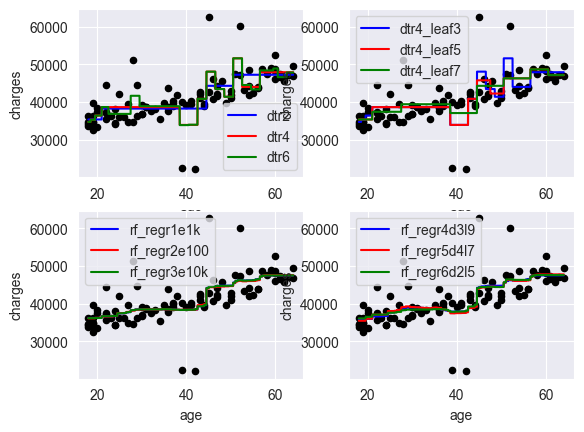

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
m_obs_smokers.plot('age', 'charges', kind='scatter', color='black', ax=ax1)
df_plot1.plot('age', 'dtr2', kind='line', color='blue', ax=ax1)
df_plot1.plot('age', 'dtr4', kind='line', color='red', ax=ax1)
df_plot1.plot('age', 'dtr6', kind='line', color='green', ax=ax1)

m_obs_smokers.plot('age', 'charges', kind='scatter', color='black', ax=ax2)
df_plot1.plot('age', 'dtr4_leaf3', kind='line', color='blue', ax=ax2)
df_plot1.plot('age', 'dtr4_leaf5', kind='line', color='red', ax=ax2)
df_plot1.plot('age', 'dtr4_leaf7', kind='line', color='green', ax=ax2)

m_obs_smokers.plot('age', 'charges', kind='scatter', color='black', ax=ax3)
df_plot1.plot('age', 'rf_regr1e1k', kind='line', color='blue', ax=ax3)
df_plot1.plot('age', 'rf_regr2e100', kind='line', color='red', ax=ax3)
df_plot1.plot('age', 'rf_regr3e10k', kind='line', color='green', ax=ax3)

m_obs_smokers.plot('age', 'charges', kind='scatter', color='black', ax=ax4)
df_plot1.plot('age', 'rf_regr4d3l9', kind='line', color='blue', ax=ax4)
df_plot1.plot('age', 'rf_regr5d4l7', kind='line', color='red', ax=ax4)
df_plot1.plot('age', 'rf_regr6d2l5', kind='line', color='green', ax=ax4)

plt.show()

In [24]:
# the forest regression models smooth out some of the overfitting of sole decision tree regressors
# there is less parameter variability/dependency in the random forest because of the averaging.  The different
# lines are closely aligned

In [26]:
df2 = df.copy(deep=True)
#label encoders turn variable values into numerical values in the same column.  These values may or may not have meaning
# for example, different regions being of a higher or lower value is meaningless.  Only that they are distinct
# pd.get_dummies on the other hand creates a new column for each value and sets it to a binary of 1 and 0 depending
# if the value is present in that row
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()

df['sex_enc'] = le1.fit_transform(df['sex'])
df['smoker_enc'] = le2.fit_transform(df['smoker'])
df['region_enc'] = le3.fit_transform(df['region'])
df['bmi_label_enc'] = le4.fit_transform(df['bmi_label'])

df2['sex_enc'] = le1.fit_transform(df2['sex'])
df2['smoker_enc'] = le2.fit_transform(df2['smoker'])
df2 = pd.get_dummies(df2, columns=['region'], dtype=int)
df2 = pd.get_dummies(df2, columns=['bmi_label'], dtype=int)

print(df.head())
print(df2.head())
print(df2.sex_enc)
print(df2.smoker_enc)

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

        bmi_label  sex_enc  smoker_enc  region_enc  bmi_label_enc  
0      Overweight        0           1           3              2  
1           Obese        1           0           2              1  
2           Obese        1           0           2              1  
3  Healthy weight        1           0           1              0  
4      Overweight        1           0           1              2  
   age     sex     bmi  children smoker      charges  sex_enc  smoker_enc  \
0   19  female  27.900         0    yes  16884.92400        0           1   
1   18    male  33.770         1   

In [31]:
# create the dfs we will use for the modeling and dfs for visualization of the models
DF2_overw_smo = df.loc[(df["smoker"] == "yes") & ((df["bmi_label"] == "Overweight") | (df["bmi_label"] == "Obese"))]
DF2_obese_smo = df.loc[(df["smoker"] == "yes") & (df["bmi_label"] == "Obese")]

# create dfs with dummy features so we can explore the importance of each category in the feature
DF2_overw_smo2 = df2.loc[(df2["smoker"] == "yes") & ((df2["bmi_label_Overweight"] == 1) | (df2["bmi_label_Obese"] == 1))]
DF2_obese_smo2 = df2.loc[(df2["smoker"] == "yes") & (df2["bmi_label_Obese"] == 1)]

In [33]:
# create dfs for the models of features whose importance we want to explore
X2 = df[["age", "bmi", "children", "sex_enc", "smoker_enc", "region_enc", "bmi_label_enc"]]
Y2 = df["charges"]
X3 = DF2_overw_smo[["age", "bmi", "children", "sex_enc", "smoker_enc", "region_enc", "bmi_label_enc"]]
Y3 = DF2_overw_smo["charges"]
X4 = DF2_obese_smo[["age", "bmi", "children", "sex_enc", "smoker_enc", "region_enc", "bmi_label_enc"]]
Y4 = DF2_obese_smo["charges"]

# creating models with the dfs that contain the dummy features to show importance of individual categories of the feature
X2A = df2[["age", "bmi", "children", "sex_enc", "smoker_enc", "region_southwest", "region_southeast", "region_northwest", "region_northeast", "bmi_label_Underweight", "bmi_label_Healthy weight", "bmi_label_Overweight", "bmi_label_Obese"]]
Y2A = df2["charges"]
X3A = DF2_overw_smo2[["age", "bmi", "children", "sex_enc", "smoker_enc", "region_southwest", "region_southeast", "region_northwest", "region_northeast", "bmi_label_Underweight", "bmi_label_Healthy weight", "bmi_label_Overweight", "bmi_label_Obese"]]
Y3A = DF2_overw_smo2["charges"]
X4A = DF2_obese_smo2[["age", "bmi", "children", "sex_enc", "smoker_enc", "region_southwest", "region_southeast", "region_northwest", "region_northeast", "bmi_label_Underweight", "bmi_label_Healthy weight", "bmi_label_Overweight", "bmi_label_Obese"]]
Y4A = DF2_obese_smo2["charges"]


# Create the models and fit them to the X and Y dataframes.
RF_regr2 = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=3, random_state=11).fit(X2, Y2)

RF_regr3 = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=3, random_state=11).fit(X3, Y3)

RF_regr4 = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=3, random_state=11).fit(X4, Y4)

RF_regr2A = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=3, random_state=11).fit(X2A, Y2A)

RF_regr3A = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=3, random_state=11).fit(X3A, Y3A)

RF_regr4A = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_leaf=3, random_state=11).fit(X4A, Y4A)

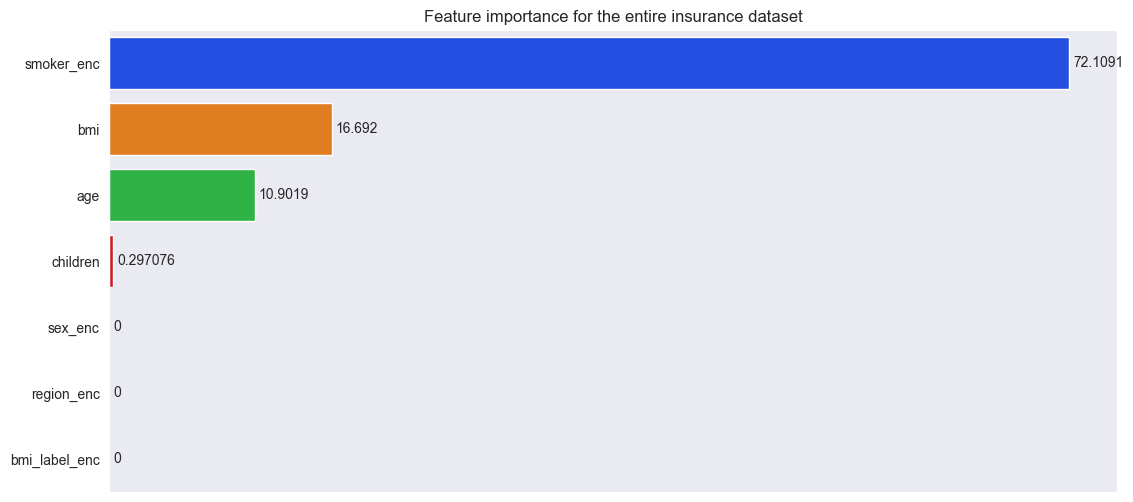

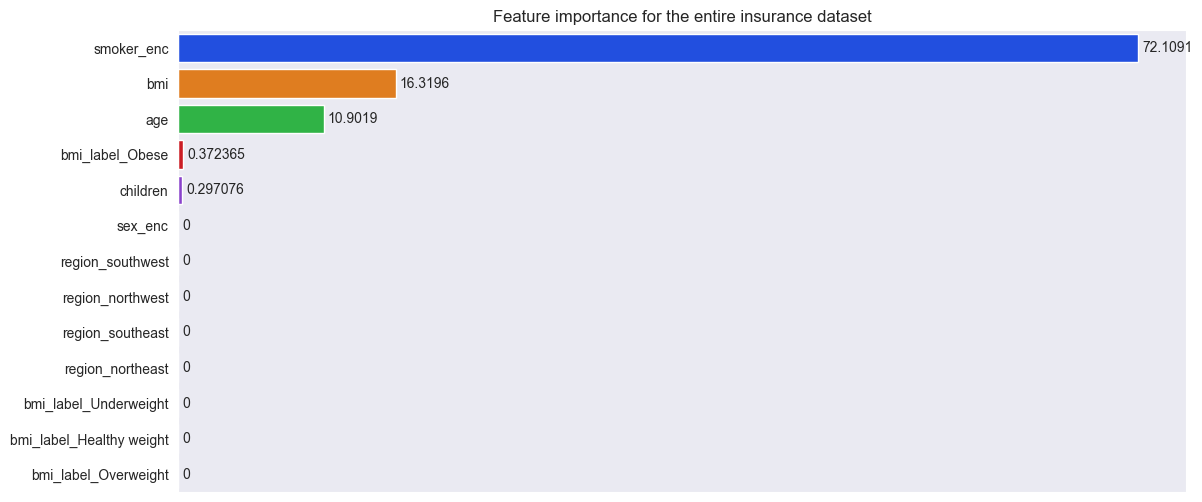

In [37]:
# feature_names_in_ and feature_importances are both scikit learn forest regression attributes.  This is a normalized value across all features
# multiplied by 100 to express in more of a percentage rather than a decimal
DF2_features = pd.DataFrame({"feature": RF_regr2.feature_names_in_, "importance": (RF_regr2.feature_importances_*100) })
DF2_features_sorted = DF2_features.sort_values(by="importance", ascending=False)

DF2A_features = pd.DataFrame({"feature": RF_regr2A.feature_names_in_, "importance": (RF_regr2A.feature_importances_*100) })
DF2A_features_sorted = DF2A_features.sort_values(by="importance", ascending=False)

# create barplots of the importance scores and features
plt.figure(figsize=(13,6))
BP2_graph = sns.barplot(data=DF2_features_sorted, x="importance", y ="feature", palette="bright")
BP2_graph.set_title("Feature importance for the entire insurance dataset")
BP2_graph.set(xlabel=None)
BP2_graph.set(ylabel=None)
BP2_graph.set(xticks=[])
for value in BP2_graph.containers:
    BP2_graph.bar_label(value, padding=3)
plt.show()

plt.figure(figsize=(13,6))
BP2_graph = sns.barplot(data=DF2A_features_sorted, x="importance", y ="feature", palette="bright")
BP2_graph.set_title("Feature importance for the entire insurance dataset")
BP2_graph.set(xlabel=None)
BP2_graph.set(ylabel=None)
BP2_graph.set(xticks=[])
for value in BP2_graph.containers:
    BP2_graph.bar_label(value, padding=3)
plt.show()